In [8]:
#importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Classification**

In [10]:
# import dataset

In [11]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)


In [12]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [13]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target


In [14]:
X_iris

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [15]:
y_iris

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=
                                  3, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file="iris_tree.dot",
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=iris.target_names,
rounded=True,
filled=True
)

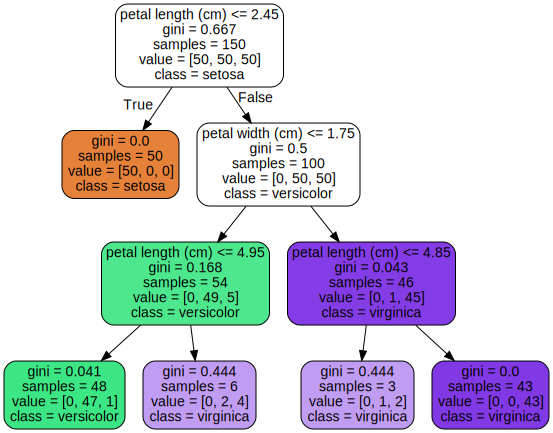

In [21]:
from graphviz import Source
Source.from_file("iris_tree.dot")

In [23]:
tree_clf.predict_proba([[5, 1.5]]).round(3)


array([[0.   , 0.333, 0.667]])

In [24]:
tree_clf.predict([[5, 1.5]])

array([2])

In [52]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)

tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [53]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf_pca,
out_file="iris_tree_2.dot",
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=iris.target_names,
rounded=True,
filled=True
)

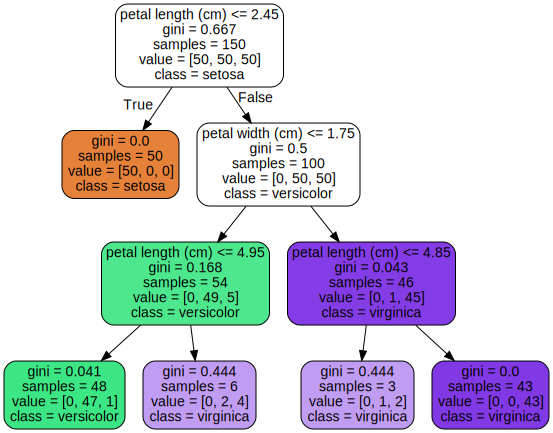

In [54]:
from graphviz import Source
Source.from_file("iris_tree.dot")

In [55]:
tree_clf.predict_proba([[5, 1.5]]).round(3)


array([[0.   , 0.333, 0.667]])

In [56]:
tree_clf.predict([[5, 1.5]])

array([2])

In [ ]:
#-------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------

In [25]:
from sklearn.datasets import make_moons # create dataset

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
# create 2 models
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # with restriction

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [27]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,random_state=43)



In [28]:
tree_clf1.score(X_moons_test, y_moons_test)


0.898

In [29]:
tree_clf2.score(X_moons_test, y_moons_test)
# model 2 is better

0.92

**Regression**

In [ ]:
# create dataset

In [30]:
import numpy as np
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)


In [31]:
X_quad

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [32]:
y_quad

array([[-0.00126044],
       [ 0.20894973],
       [ 0.061148  ],
       [-0.00812529],
       [ 0.16496754],
       [ 0.13018559],
       [ 0.16550751],
       [ 0.15049881],
       [-0.0141428 ],
       [ 0.06297131],
       [ 0.25880412],
       [ 0.20029821],
       [ 0.13460251],
       [ 0.09306831],
       [ 0.12178686],
       [ 0.14765253],
       [ 0.0321864 ],
       [-0.01823052],
       [-0.01760638],
       [ 0.02319001],
       [ 0.01058353],
       [ 0.13849348],
       [ 0.05012112],
       [ 0.03853874],
       [ 0.00225489],
       [ 0.11766368],
       [ 0.08357942],
       [ 0.06820685],
       [ 0.02418214],
       [ 0.18427829],
       [-0.01520642],
       [ 0.12061616],
       [ 0.18359355],
       [ 0.21934824],
       [ 0.22864413],
       [ 0.0932882 ],
       [ 0.01700594],
       [ 0.12399655],
       [ 0.02277893],
       [ 0.02499169],
       [ 0.14820744],
       [-0.03112021],
       [ 0.22112357],
       [ 0.17717613],
       [ 0.03609066],
       [ 0

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [49]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_reg,
out_file="random.dot",

rounded=True,
filled=True
)

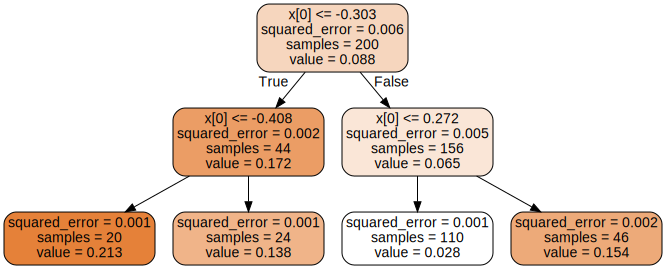

In [50]:
from graphviz import Source
Source.from_file("random.dot")

DecisionTreeClassifier(max_depth=2, random_state=42)